In [1]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Sans Serif'

sys.path.append('/ceph/submit/data/user/k/kyoon/KYoonStudy/ssm_regression/toy')
from data_sho import get_sho_data_np
from data_sinegaussian import get_sg_data_np

Using device=device(type='cpu')
Using device=device(type='cpu')


In [2]:
_omega_0, _beta = 2, 0.15
t_vals, y_data, y_clean, y_noise, omega_0, beta, shift = get_sho_data_np(shift=-4, omega_0=_omega_0, beta=_beta, num_points=200)
_envel = np.exp(-_omega_0 * _beta * (t_vals-shift))


In [3]:
fig, ax = plt.subplots(figsize=(9.6, 5.6), dpi=1200)
ax.plot(t_vals, y_clean, color='blue', label='damped harmonic oscillator waveform', linestyle='dashed')
# ax.set_title('Damped Harmonic Oscillator', fontsize=12)
ax.set_xlabel('t', fontsize=12, loc='right', labelpad=-5)
ax.set_ylabel('y(t)', fontsize=12, loc='top', rotation='horizontal', labelpad=-5)

# Plot data
ax.scatter(t_vals, y_data, color='black', s=3, label='data with added white noise')

# ax.plot(t_vals, _envel, color='purple', alpha=0.3, linestyle='dashed')
# ax.plot(t_vals, -_envel, color='purple', alpha=0.3, linestyle='dashed')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
# Add manually positioned y-tick labels, shifted upward
ax.set_yticklabels([])
yticks = ax.get_yticks()
for _y in yticks[1:-1]:
    ax.text(-0.2, _y + 0, f'{_y:.1f}', va='bottom', ha='right', fontsize=10)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.legend()

In [4]:
_omega_0, _beta = 2, 0.15
p_shift_m3 = get_sho_data_np(shift=-3, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_m2 = get_sho_data_np(shift=-2, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_m1 = get_sho_data_np(shift=-1, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_m0 = get_sho_data_np(shift=0, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_p1 = get_sho_data_np(shift=1, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_p2 = get_sho_data_np(shift=2, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_p3 = get_sho_data_np(shift=3, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_p4 = get_sho_data_np(shift=4, omega_0=_omega_0, beta=_beta, num_points=200)
p_shift_p5 = get_sho_data_np(shift=5, omega_0=_omega_0, beta=_beta, num_points=200)

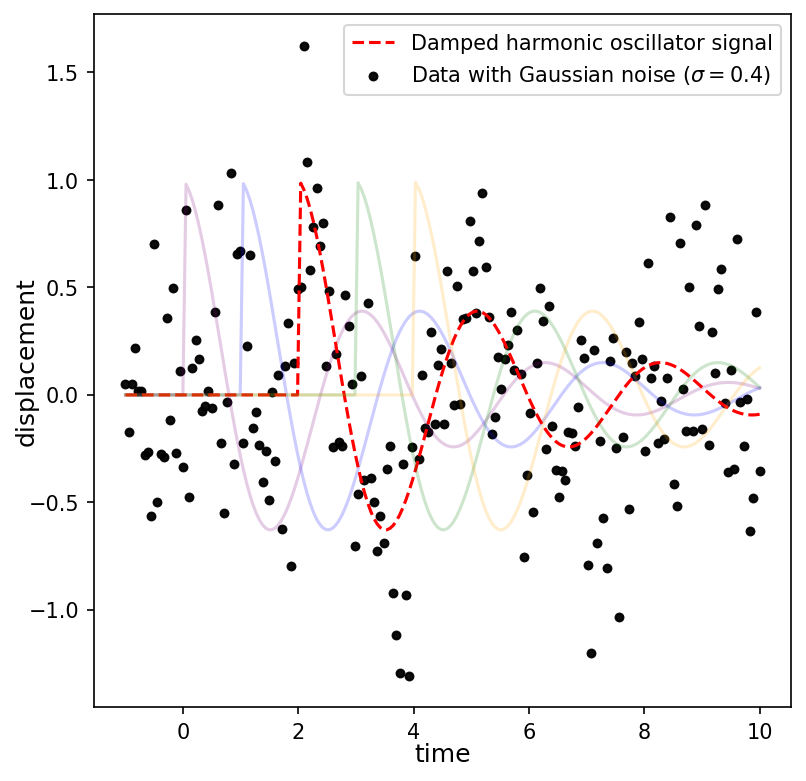

In [5]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
ax.plot(t_vals, p_shift_m0[2], color='purple', alpha=0.2)
ax.plot(t_vals, p_shift_p1[2], color='blue', alpha=0.2)
ax.plot(t_vals, p_shift_p2[2], color='red', alpha=1.0, linestyle='dashed', label='Damped harmonic oscillator signal')
ax.plot(t_vals, p_shift_p3[2], color='green', alpha=0.2)
ax.plot(t_vals, p_shift_p4[2], color='orange', alpha=0.2)
# ax.set_title('Damped Harmonic Oscillator', fontsize=12)
ax.set_xlabel('time', fontsize=12, loc='center', labelpad=0)
ax.set_ylabel('displacement', fontsize=12, loc='center', rotation='vertical', labelpad=-5)
ax.scatter(t_vals, p_shift_p2[1], s=14, alpha=.95, color='black', label='Data with Gaussian noise ($\sigma=0.4$)')
ax.legend()

In [11]:
_f_0, _tau = 1., 2
gp_shift_m2 = get_sg_data_np(shift=-2, f_0=_f_0, tau=_tau, _num_points=200)
gp_shift_m1 = get_sg_data_np(shift=-1, f_0=_f_0, tau=_tau, _num_points=200)
gp_shift_m0 = get_sg_data_np(shift=0, f_0=_f_0, tau=_tau, _num_points=200)
gp_shift_p1 = get_sg_data_np(shift=1, f_0=_f_0, tau=_tau, _num_points=200)
gp_shift_p2 = get_sg_data_np(shift=2, f_0=_f_0, tau=_tau, _num_points=200)

In [7]:
t_vals = gp_shift_m2[0]

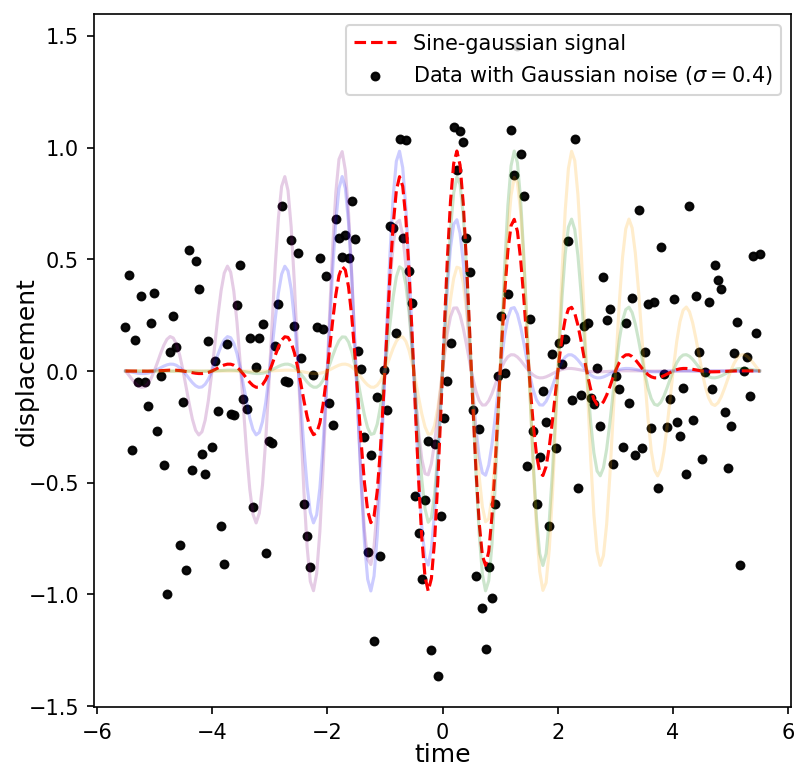

In [12]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
ax.plot(t_vals, gp_shift_m2[2], color='purple', alpha=0.2)
ax.plot(t_vals, gp_shift_m1[2], color='blue', alpha=0.2)
ax.plot(t_vals, gp_shift_m0[2], color='red', alpha=1.0, linestyle='dashed', label='Sine-gaussian signal')
ax.plot(t_vals, gp_shift_p1[2], color='green', alpha=0.2)
ax.plot(t_vals, gp_shift_p2[2], color='orange', alpha=0.2)
# ax.set_title('Damped Harmonic Oscillator', fontsize=12)
ax.set_xlabel('time', fontsize=12, loc='center', labelpad=0)
ax.set_ylabel('displacement', fontsize=12, loc='center', rotation='vertical', labelpad=-5)
ax.scatter(t_vals, gp_shift_m0[1], s=14, alpha=.95, color='black', label='Data with Gaussian noise ($\sigma=0.4$)')
ax.legend()